In [1]:
#Loading packages
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score 
import datetime as dt
from scipy import stats as sts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
import math

In [2]:
#loading accepted data 
accepted=pd.read_csv("accepted_2007_to_2018Q4 2.csv",low_memory=False)

In [3]:
#checking first few columns of accpted data 
accepted.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#loading rejected data
rejected=pd.read_csv("rejected_2007_to_2018Q4.csv",low_memory=False)

In [5]:
#checking first few rows of rejected data
rejected.head(5)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [6]:
#checking column names
from IPython.display import display_html
display(accepted.info())
display(rejected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


None

In [7]:
#displaying column names
display(rejected.columns)
display(accepted.columns)

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [8]:
#checking missing values 
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [9]:
#checking sum of data per column of rejected
rejected.count().tail()

Debt-To-Income Ratio    27648741
Zip Code                27648448
State                   27648719
Employment Length       26697386
Policy Code             27647823
dtype: int64

In [10]:
#checking sum of data per column of accepted
accepted.count().tail()

settlement_status        34246
settlement_date          34246
settlement_amount        34246
settlement_percentage    34246
settlement_term          34246
dtype: int64

In [11]:
#checking percentage of missing data on rejected dataset
rejected_missing=rejected.isna()
rejected_num_missing = rejected_missing.sum()
rejected_num_missing*100/len(rejected)

Amount Requested         0.000000
Application Date         0.000000
Loan Title               0.004713
Risk_Score              66.902251
Debt-To-Income Ratio     0.000000
Zip Code                 0.001060
State                    0.000080
Employment Length        3.440862
Policy Code              0.003320
dtype: float64

In [12]:
#coping rejected data before wrangling to maintain original set incase we want to go back
import copy
rejected_1=copy.deepcopy(rejected)

In [13]:
#droping unwanted columns
rejected_1.drop(['Risk_Score','Policy Code','Loan Title'],
  axis='columns', inplace=True)

In [14]:
#Taking the 1st 5000  objects for eas of computation
rejected_1=rejected_1.iloc[:5000,:]

In [15]:
#checking information of newly created rejecyted sample after dropping some column
rejected_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount Requested      5000 non-null   float64
 1   Application Date      5000 non-null   object 
 2   Debt-To-Income Ratio  5000 non-null   object 
 3   Zip Code              5000 non-null   object 
 4   State                 5000 non-null   object 
 5   Employment Length     5000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 234.5+ KB


In [16]:
#renaming columns in accpted to match the ones in rejected
accepted.rename(inplace=True, columns={'loan_amnt': 'Amount Requested',
                                             'issue_d': 'Application Date',
                                             'dti': 'Debt-To-Income Ratio',
                                             'addr_state': 'State',
                                             'emp_length': 'Employment Length',
                                             'policy_code': 'Policy Code'})

In [17]:
#picking few sample to ease computation time
accepted_1=accepted.iloc[:5000,:]

In [18]:
#checking information on accepted data 
accepted_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 5.8+ MB


In [19]:
#checking columns of accepted data
accepted_1.columns

Index(['id', 'member_id', 'Amount Requested', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [20]:
#checking columns of accepted
accepted_1.head(4)

,id,member_id,Amount Requested,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#creating a second copy of dataset with similar column names
accepted_2 = accepted[["Amount Requested", "Application Date", "Debt-To-Income Ratio",
                                  "Employment Length","State"]]
rejected_2 = rejected[["Amount Requested", "Application Date", "Debt-To-Income Ratio",
                                  "Employment Length","State"]]

In [22]:
#checking the percentahge of missing values
rejected_missing_2=rejected_2.isna()
rejected_num_missing = rejected_missing_2.sum()
rejected_num_missing*100/len(rejected_2)

Amount Requested        0.000000
Application Date        0.000000
Debt-To-Income Ratio    0.000000
Employment Length       3.440862
State                   0.000080
dtype: float64

In [23]:
#checking the percentahge of missing values
accepted_missing=accepted_2.isna()
accepted_num_missing = accepted_missing.sum()
accepted_num_missing*100/len(accepted_2)

Amount Requested        0.001460
Application Date        0.001460
Debt-To-Income Ratio    0.077144
Employment Length       6.499754
State                   0.001460
dtype: float64

In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
#since in both the our new datasets accpted_2 and rejected_2 we have very few missing data points we can drop the NA
accepted_2.dropna(inplace=True)
rejected_2.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
#checking shape
accepted_2.shape

(2113648, 5)

In [27]:
#checking shape
rejected_2.shape

(26697364, 5)

In [28]:
#checking columns
accepted_2.head(5)

,Amount Requested,Application Date,Debt-To-Income Ratio,Employment Length,State
0,3600.0,Dec-2015,5.91,10+ years,PA
1,24700.0,Dec-2015,16.06,10+ years,SD
2,20000.0,Dec-2015,10.78,10+ years,IL
3,35000.0,Dec-2015,17.06,10+ years,NJ
4,10400.0,Dec-2015,25.37,3 years,PA


In [29]:
#checking columns
rejected_2.head(5)

,Amount Requested,Application Date,Debt-To-Income Ratio,Employment Length,State
0,1000.0,2007-05-26,10%,4 years,NM
1,1000.0,2007-05-26,10%,< 1 year,MA
2,11000.0,2007-05-27,10%,1 year,MD
3,6000.0,2007-05-27,38.64%,< 1 year,MA
4,1500.0,2007-05-27,9.43%,< 1 year,MD


In [30]:
#picking a smaller sample to ease computation
accepted_2=accepted_2.iloc[:3000,:]
rejected_2=rejected_2.iloc[:3000,:]

In [31]:
#converting the Application Date columns in both as type date time
accepted_2["Application Date"] = accepted_2["Application Date"].apply(pd.to_datetime)
rejected_2["Application Date"] = rejected_2["Application Date"].apply(pd.to_datetime)

In [32]:
#removing the % sign
def dti_percent_to_decimal(row):
    return np.float64(row['Debt-To-Income Ratio'].strip("%"))

rejected_2['Debt-To-Income Ratio'] = rejected_2.apply(dti_percent_to_decimal, axis=1)

In [33]:
#cleaning the column employement lenth to remove the greater or less than sign, all measurements will be set to years so anything less than 1 will be defaulted to 0 
#and greater than 10 round of to 10, after all we arent real;ly giving the column much weight
def Employment_Lengtht(t):
    string_int = {"< 1 year" : 0, "1 year" : 1, "2 years" : 2,
                   "3 years" : 3, "4 years" : 4, "5 years" : 5,
                   "6 years" : 6, "7 years" : 7, "8 years" : 8,
                   "9 years" : 9, "10+ years": 10}
    return string_int[t]


In [34]:
accepted_2['Employment Length'] = list(map(Employment_Lengtht, accepted_2['Employment Length']))
rejected_2['Employment Length'] = list(map(Employment_Lengtht, rejected_2['Employment Length']))

In [35]:
#we can now combine the datasets and continue to process together, labeling approval as 1 and rejection as 0
accepted_2.insert(0, 'label', 1)
rejected_2.insert(0, 'label', 0)

In [36]:
#combining the newly dataset 
loan_application = pd.concat([accepted_2, rejected_2])

In [37]:
#checking the column of our new combined dataset
loan_application.head(4)

,label,Amount Requested,Application Date,Debt-To-Income Ratio,Employment Length,State
0,1,3600.0,2015-12-01,5.91,10,PA
1,1,24700.0,2015-12-01,16.06,10,SD
2,1,20000.0,2015-12-01,10.78,10,IL
3,1,35000.0,2015-12-01,17.06,10,NJ


In [38]:
#encoding state to use as dummy variable
states_encoded = pd.get_dummies(loan_application['State'])
states_encoded.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#columns with only months
loan_application["Application Month"] = loan_application['Application Date'].map(lambda x: x.month)

In [40]:
loan_application

,label,Amount Requested,Application Date,Debt-To-Income Ratio,Employment Length,State,Application Month
0,1,3600.0,2015-12-01,5.91,10,PA,12
1,1,24700.0,2015-12-01,16.06,10,SD,12
2,1,20000.0,2015-12-01,10.78,10,IL,12
3,1,35000.0,2015-12-01,17.06,10,NJ,12
4,1,10400.0,2015-12-01,25.37,3,PA,12
...,...,...,...,...,...,...,...
2995,0,2000.0,2007-11-23,0.00,6,NY,11
2996,0,10000.0,2007-11-23,3.85,0,IN,11
2997,0,2000.0,2007-11-23,9.00,10,WI,11
2998,0,5000.0,2007-11-23,5.95,2,OH,11


In [41]:
#converting months to sin and cosin to create some sort of seasonal trends given that some dates were not covered
months = pd.to_datetime(loan_application['Application Month']).dt.strftime('%m').astype(float)
msin=np.sin(2.*np.pi*months/12.).astype(float)
mcos=np.cos(2.*np.pi*months/12.).astype(float)

In [42]:
#adding the sin and cos month coded to the dataset
loan_application.drop(['Application Month'],axis=1,inplace=True)
loan_application=pd.concat([loan_application,pd.DataFrame({"msin":msin,"mcos":mcos})],axis=1)

In [43]:
#creating new data incase we need to go back to the original, it is always a good practice so as not to lose originality
loan_application_2=copy.deepcopy(loan_application)

In [44]:
#dropping application date as we already have a coded one
loan_application_2.drop('Application Date',
  axis='columns', inplace=True)

In [45]:
#dropping state and adding it back as dummy variable
loan_application_2.drop('State',
  axis='columns', inplace=True)

In [46]:
#combing all changes to a new dataset called loan_application_2
loan_application_2= pd.concat([loan_application_2, states_encoded], axis=1, sort=False)

In [47]:
loan_application_2

,label,Amount Requested,Debt-To-Income Ratio,Employment Length,msin,mcos,AK,AL,AR,AZ,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,1,3600.0,5.91,10,0.5,0.866025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24700.0,16.06,10,0.5,0.866025,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,20000.0,10.78,10,0.5,0.866025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,35000.0,17.06,10,0.5,0.866025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10400.0,25.37,3,0.5,0.866025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,2000.0,0.00,6,0.5,0.866025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,10000.0,3.85,0,0.5,0.866025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,2000.0,9.00,10,0.5,0.866025,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2998,0,5000.0,5.95,2,0.5,0.866025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#the X variable will take everything expect the labels, as x is the input and is supposed to match to the correct label
X =loan_application_2.drop(columns = ["label"])
y = loan_application_2['label']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=30,stratify=y)

In [51]:
from sklearn import preprocessing

Average accuracy of holdout approach:  0.8116888888888889
Mean Time taken by holdout approach:  0.5361235618591309
-------------------


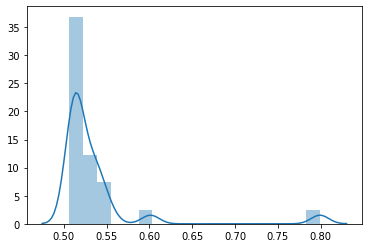

In [57]:
#Random forest using train test split
randomforest_split = RandomForestClassifier()
time_holdout = []
score = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_holdout = time.time()
  #trains the random forest using cross validation
  randomforest_split.fit(X = X_train, y = y_train)
  score.append(randomforest_split.score(X_test, y_test))
  
  end_holdout = time.time()
  time_holdout.append(end_holdout - start_holdout)
    
print("Average accuracy of holdout approach: ",np.mean(score))
print('Mean Time taken by holdout approach: ' ,np.mean(time_holdout))
print('-------------------')
sns.distplot(time_holdout)
plt.show()

Average accuracy of cross validation approach:  0.8160000000000001
Mean Time taken by cross validation approach:  4.985325136184692
-------------------


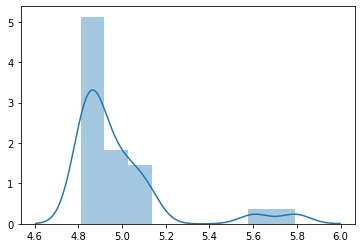

In [83]:
randomforest = RandomForestClassifier()

time_cv = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_cv = time.time()
  #trains the random forest using cross validation
  cv_score = cross_val_score(randomforest, X, y, cv=8)
  end_cv = time.time()
  time_cv.append(end_cv - start_cv)

print("Average accuracy of cross validation approach: ",np.mean(cv_score))
print('Mean Time taken by cross validation approach: ' ,np.mean(time_cv))
print('-------------------')
sns.distplot(time_cv)
plt.show()

Average accuracy of holdout approach:  0.54
Mean Time taken by holdout approach:  0.0092022705078125
-------------------


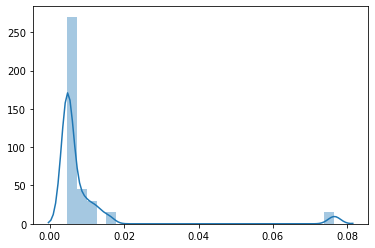

In [84]:
#applying the Naive bayes classification model
gnb = GaussianNB()
time_cv = []
score = []
for i in range(25):
  # calculating time taken for model to run
  start_cv = time.time()
  #training random forest using cross validation
  gnb.fit(X = X_train, y = y_train)
  score.append(gnb.score(X_test, y_test))
  #cv_score = cross_val_score(randomforest_split, X, y, cv=8)
  end_cv = time.time()
  time_cv.append(end_cv - start_cv)
    
print("Average accuracy of holdout approach: ",np.mean(score))
print('Mean Time taken by holdout approach: ' ,np.mean(time_cv))
print('-------------------')
sns.distplot(time_cv)
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, roc_auc_score
logRegr = LogisticRegression(max_iter=10000)
logRegr.fit(X_train, y_train)

#  predictions using test set
preds = logRegr.predict(X_test)

In [62]:
#Evaluating performance
print("The accuracy of the model is %.3f" %accuracy_score(y_test, preds)) 
print("The recall of the model  is %.3f" % recall_score(y_test, preds))
print("The precision of the model is  is %.3f" % precision_score(y_test, preds))


The accuracy of the model is 0.742
The recall of the model  is 0.744
The precision of the model is  is 0.740


In [63]:
# no skill prediction probability
probs = [0 for _ in range(len(y_test))]

In [64]:
# probabilities for positive outcomes
reg_probs = logRegr.predict_proba(X_test)[:, 1]

In [65]:
# calculate roc curves
no_pr, no_skl_tpr, _ = roc_curve(y_test, probs )
Reg_pr, logr_tpr, _ = roc_curve(y_test, reg_probs)

Text(0, 0.5, 'True Positive Rate')

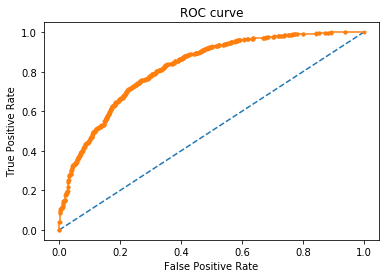

In [66]:
plt.plot(no_pr,no_skl_tpr, linestyle='--', label='No Skill')
plt.plot(Reg_pr, logr_tpr, marker='.', label='Logistic')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [67]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, target_names=["acepted_2","rejected_2"]))

              precision    recall  f1-score   support

   acepted_2       0.74      0.74      0.74       900
  rejected_2       0.74      0.74      0.74       900

    accuracy                           0.74      1800
   macro avg       0.74      0.74      0.74      1800
weighted avg       0.74      0.74      0.74      1800



#conclution
With is dataset random forest seem to do better than any othe classification model. 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=30,stratify=y)

Text(0.5, 1.0, 'unscaled train data\n')

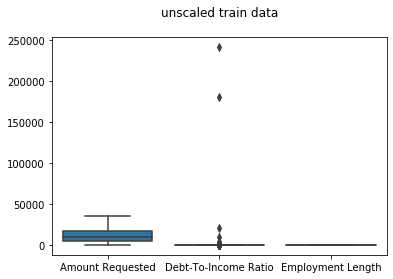

In [70]:
sns.boxplot(data=X_train[['Amount Requested', 'Debt-To-Income Ratio', 'Employment Length']])
plt.title("unscaled train data\n")

Text(0.5, 1.0, 'unscaled test data\n')

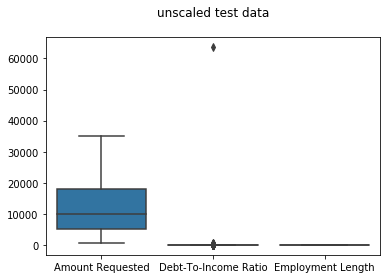

In [71]:
sns.boxplot(data=X_test[['Amount Requested', 'Debt-To-Income Ratio', 'Employment Length']])
plt.title("unscaled test data\n")

In [72]:
#using sklearn to normalize data 
from sklearn.preprocessing import MinMaxScaler

# fiting scaler 
normalized = MinMaxScaler().fit(X_train)

# transform training data
X_train_standadize= normalized.transform(X_train)

# transform testing dataabs
X_test_standadize = normalized.transform(X_test)

Text(0.5, 1.0, 'Normalized train data\n')

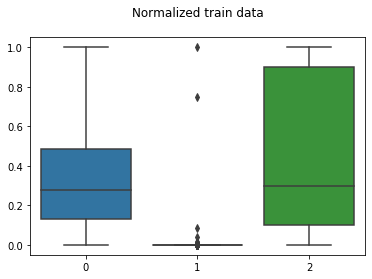

In [73]:
sns.boxplot(data=X_train_standadize[:, [0,1,2]])
plt.title("Normalized train data\n")

Text(0.5, 1.0, 'scaled by Normalization test data\n')

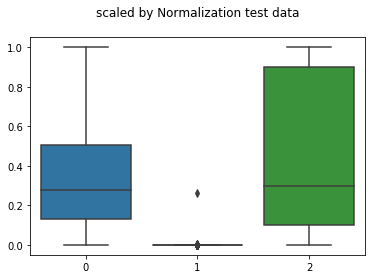

In [74]:
sns.boxplot(data=X_test_standadize[:, [0,1,2]] )
plt.title("scaled by Normalization test data\n")

In [75]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Amount Requested', 'Debt-To-Income Ratio', 'Employment Length']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [76]:
#ploting standardized 
X_test_stand

,Amount Requested,Debt-To-Income Ratio,Employment Length,msin,mcos,AK,AL,AR,AZ,CA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
384,-0.866352,-0.020307,-1.149435,0.5,0.866025,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1254,1.412857,-0.025824,-0.631616,0.5,0.866025,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2624,-0.592847,-0.024215,1.439660,0.5,0.866025,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
919,1.298897,-0.023829,-0.890525,0.5,0.866025,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0.501174,-0.023721,1.439660,0.5,0.866025,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,1.868699,-0.020904,1.439660,0.5,0.866025,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,-0.638431,-0.027222,-1.149435,0.5,0.866025,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
688,-1.094273,-0.027928,-0.890525,0.5,0.866025,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2629,-0.410510,-0.019063,-0.631616,0.5,0.866025,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'standardised train data\n')

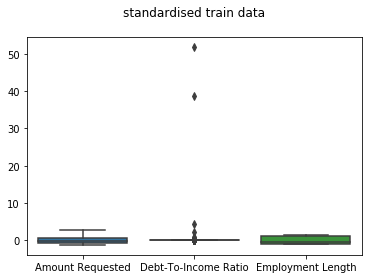

In [77]:
sns.boxplot(data=  X_train_stand[['Amount Requested', 'Debt-To-Income Ratio', 'Employment Length']])
plt.title("standardised train data\n")

Text(0.5, 1.0, 'standardised test data\n')

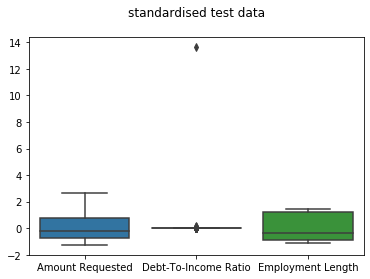

In [78]:
sns.boxplot(data=  X_test_stand[['Amount Requested', 'Debt-To-Income Ratio', 'Employment Length']])
plt.title("standardised test data\n")

Average accuracy of holdout approach:  0.8122222222222223
Mean Time taken by holdout approach:  0.5513941955566406
-------------------


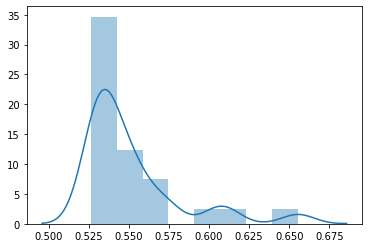

In [80]:
#Random forest using train test split
randomforest_split = RandomForestClassifier()
time_holdout = []
score = []
for i in range(25):
    
  #time.time() is used to calculate the time taken for the model to run
  start_holdout = time.time()
  #trains the random forest using cross validation
  randomforest_split.fit(X = X_train, y = y_train)
  score.append(randomforest_split.score(X_test, y_test))
  
  end_holdout = time.time()
  time_holdout.append(end_holdout - start_holdout)
    
print("Average accuracy of holdout approach: ",np.mean(score))
print('Mean Time taken by holdout approach: ' ,np.mean(time_holdout))
print('-------------------')
sns.distplot(time_holdout)
plt.show()